In [37]:
import pandas as pd
file_path = 'EUR_USD Historical Data.csv'
df = pd.read_csv(file_path) #Removed the unexpected indent.
print(df.head())  # Print the first few rows of the DataFrame

         Date   Price    Open    High     Low  Vol. Change %
0  28-06-2024  1.0713  1.0703  1.0726  1.0684   NaN    0.10%
1  27-06-2024  1.0702  1.0680  1.0728  1.0677   NaN    0.22%
2  26-06-2024  1.0679  1.0713  1.0719  1.0665   NaN   -0.32%
3  25-06-2024  1.0713  1.0735  1.0745  1.0690   NaN   -0.18%
4  24-06-2024  1.0732  1.0688  1.0747  1.0683   NaN    0.38%


Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
dtype: object
          Price      Open      High       Low  Vol.
Price  1.000000  0.998568  0.999328  0.999342   NaN
Open   0.998568  1.000000  0.999356  0.999340   NaN
High   0.999328  0.999356  1.000000  0.999088   NaN
Low    0.999342  0.999340  0.999088  1.000000   NaN
Vol.        NaN       NaN       NaN       NaN   NaN


<ipython-input-38-6e97200ae6af>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


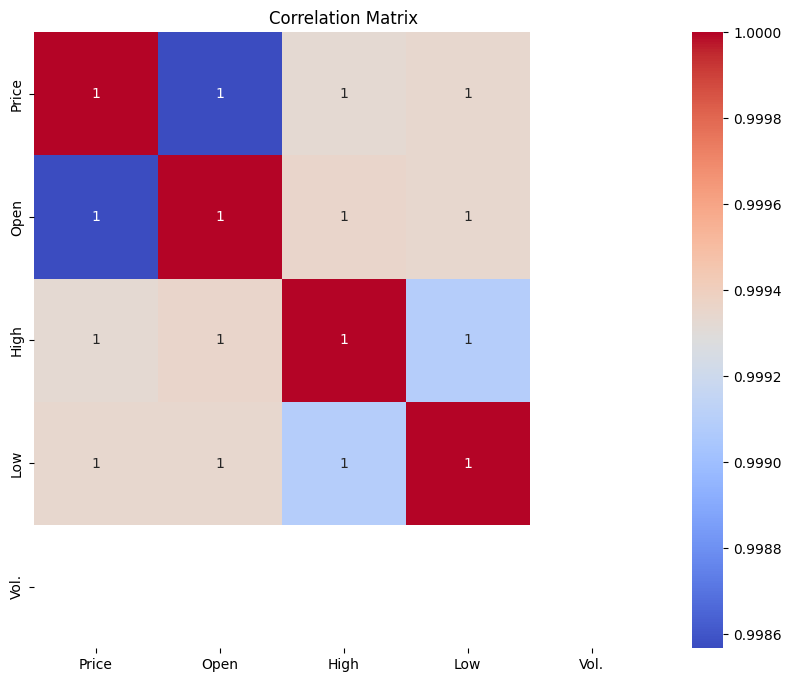

In [38]:
# Check data types
print(df.dtypes)

# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])  # Selects only numerical columns

# Example correlation matrix
correlation_matrix = numerical_features.corr()  # Calculate correlation for numerical columns only
print(correlation_matrix)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns # Importing seaborn as well

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

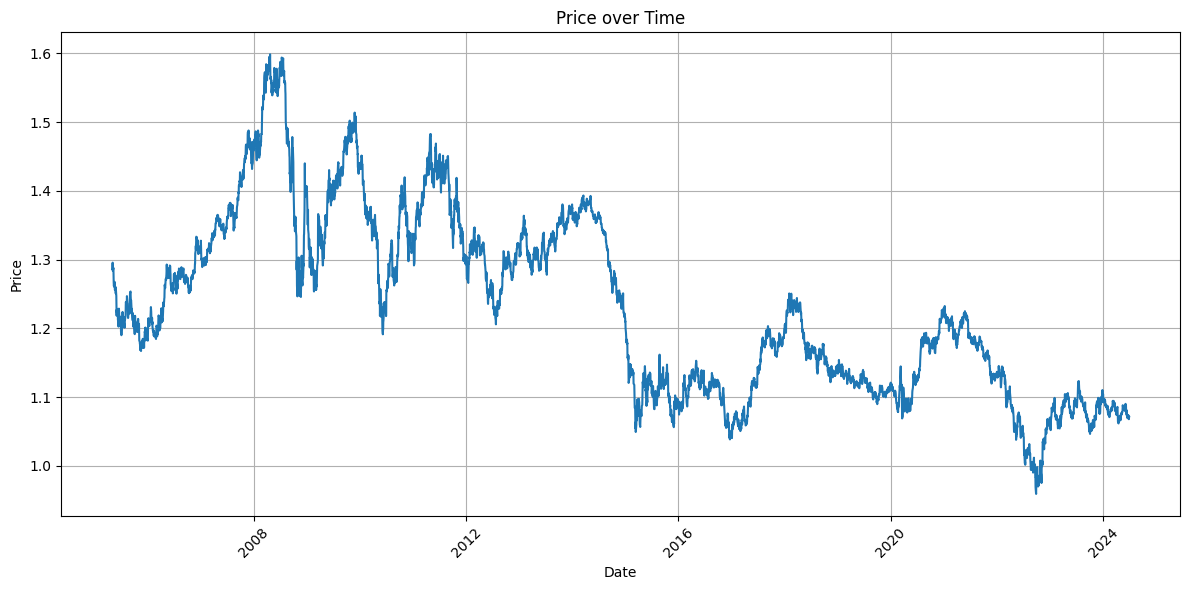

In [39]:

import matplotlib.pyplot as plt

# Assuming 'Price' is the column name containing the prices
# and 'Date' is the column name containing the dates

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


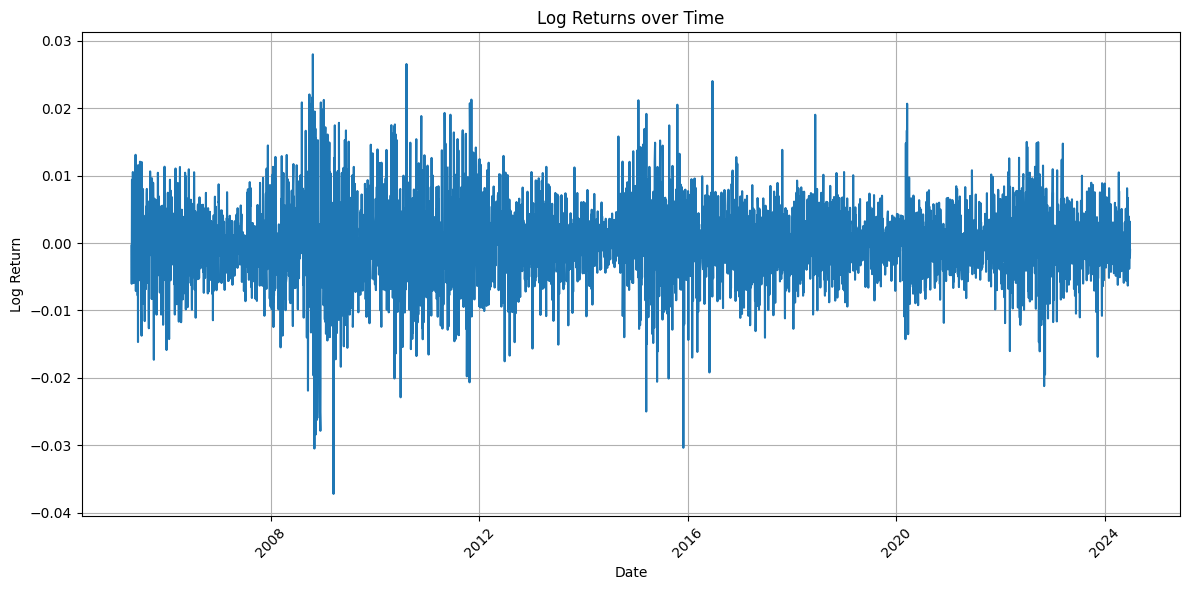

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code)

# Calculate log returns
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Plot log returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Log_Return'])
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Log Returns over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


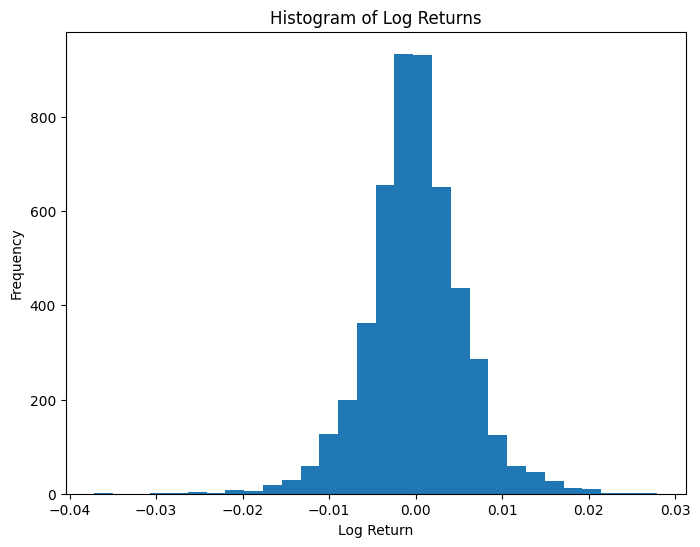

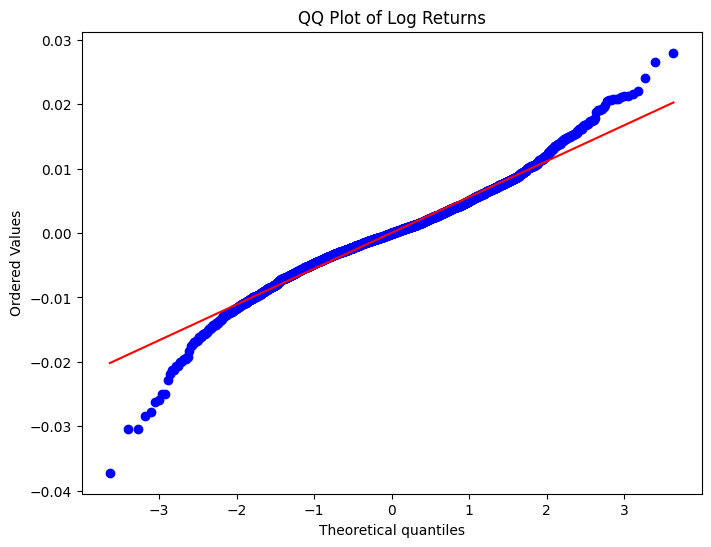

Jarque-Bera Test: Statistic=1257.4098, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=0.0471, p-value=0.0000
Anderson-Darling Test: Statistic=24.3794
Significance level: 15.0%, Critical Value: 0.576
Significance level: 10.0%, Critical Value: 0.655
Significance level: 5.0%, Critical Value: 0.786
Significance level: 2.5%, Critical Value: 0.917
Significance level: 1.0%, Critical Value: 1.091


In [41]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
df = df.dropna(subset=['Log_Return'])
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Log_Return'], bins=30)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Histogram of Log Returns')
plt.show()

# QQ-Plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Log_Return'], dist="norm", plot=plt)
plt.title('QQ Plot of Log Returns')
plt.show()

# Jarque-Bera test
jarque_bera = stats.jarque_bera(df['Log_Return'])
print(f"Jarque-Bera Test: Statistic={jarque_bera[0]:.4f}, p-value={jarque_bera[1]:.4f}")

# Kolmogorov-Smirnov test
ks_test = stats.kstest(df['Log_Return'], 'norm', args=(df['Log_Return'].mean(), df['Log_Return'].std()))
print(f"Kolmogorov-Smirnov Test: Statistic={ks_test[0]:.4f}, p-value={ks_test[1]:.4f}")

# Anderson-Darling test
anderson_test = stats.anderson(df['Log_Return'], dist='norm')
print(f"Anderson-Darling Test: Statistic={anderson_test.statistic:.4f}")
for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    print(f"Significance level: {sl}%, Critical Value: {cv}")


In [42]:

import numpy as np
# Calculate historical volatility (standard deviation of log returns)
historical_volatility = np.std(df['Log_Return']) * np.sqrt(252)  # Annualized volatility (252 trading days)
print(f"Historical Volatility: {historical_volatility:.4f}")


Historical Volatility: 0.0893


In [43]:
cad_3month_treasury_rate = 0.02  # Example rate for CAD (annualized)
inr_3month_treasury_rate = 0.05  # Example rate for INR (annualized)

risk_free_rate_cad = cad_3month_treasury_rate
risk_free_rate_inr = inr_3month_treasury_rate

print(f"Risk-free rate for CAD (3-month treasury rate): {risk_free_rate_cad:.4f}")
print(f"Risk-free rate for INR (3-month treasury rate): {risk_free_rate_inr:.4f}")


Risk-free rate for CAD (3-month treasury rate): 0.0200
Risk-free rate for INR (3-month treasury rate): 0.0500


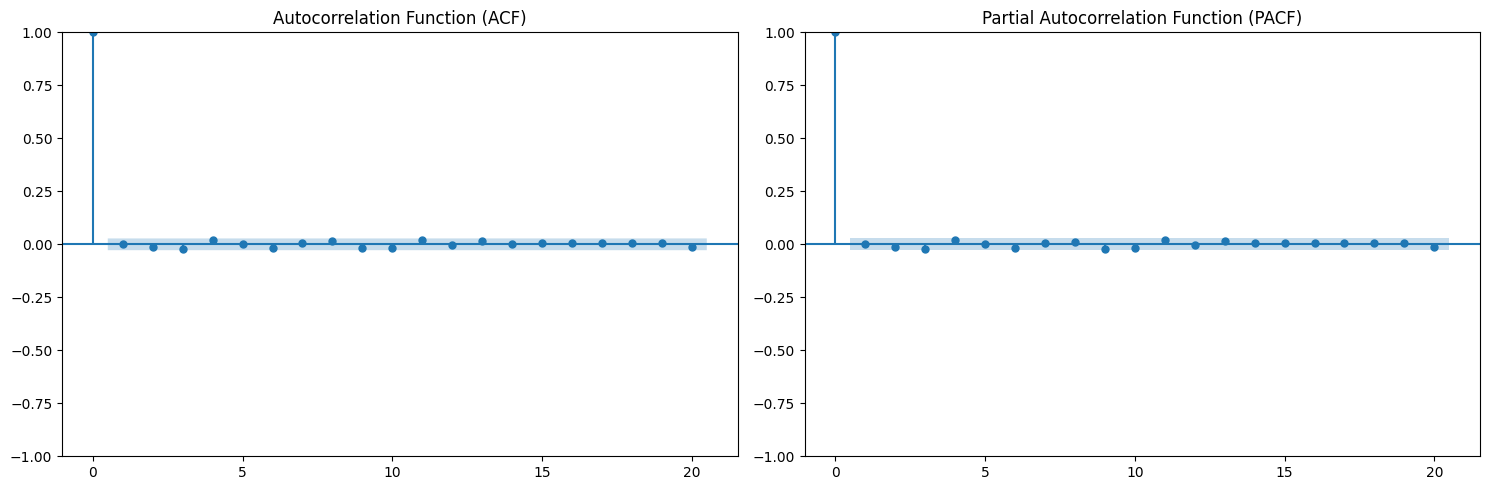

      lb_stat  lb_pvalue
1    0.017290   0.895385
2    0.674072   0.713883
3    3.366513   0.338492
4    5.064462   0.280747
5    5.120860   0.401309
6    6.514020   0.368133
7    6.660274   0.465088
8    7.612778   0.472179
9    9.568714   0.386514
10  11.302805   0.334418
11  13.464591   0.264047
12  13.483688   0.334885
13  14.544356   0.336654
14  14.606254   0.405588
15  14.911847   0.457786
16  15.245821   0.506713
17  15.387961   0.567559
18  15.497750   0.627554
19  15.834690   0.668278
20  16.778227   0.667324

Ljung-Box Test:
Lag 1: p-value = 0.8954
Lag 2: p-value = 0.7139
Lag 3: p-value = 0.3385
Lag 4: p-value = 0.2807
Lag 5: p-value = 0.4013
Lag 6: p-value = 0.3681
Lag 7: p-value = 0.4651
Lag 8: p-value = 0.4722
Lag 9: p-value = 0.3865
Lag 10: p-value = 0.3344
Lag 11: p-value = 0.2640
Lag 12: p-value = 0.3349
Lag 13: p-value = 0.3367
Lag 14: p-value = 0.4056
Lag 15: p-value = 0.4578
Lag 16: p-value = 0.5067
Lag 17: p-value = 0.5676
Lag 18: p-value = 0.6276
Lag 19: p-value =

In [44]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

file_path = 'EUR_USD Historical Data.csv'
df = pd.read_csv(file_path)

# ... (Your existing code for data loading and preprocessing)

# Calculate log returns
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))
df = df.dropna(subset=['Log_Return'])

# Autocorrelation and Partial Autocorrelation Functions (ACF and PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df['Log_Return'], lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Log_Return'], lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(df['Log_Return'], lags=20)  # Test up to 20 lags
print(lb_test)
print("\nLjung-Box Test:")
for lag, p_value in zip(lb_test.index, lb_test['lb_pvalue']):
  print(f"Lag {lag}: p-value = {p_value:.4f}")


# Interpretation of the tests

# ACF and PACF plots:  Significant spikes at certain lags (outside the confidence bands) suggest autocorrelation.
# Ljung-Box test: A small p-value indicates evidence against the null hypothesis of no autocorrelation.  If the p-value is less than your significance level (e.g., 0.05),
# you'd reject the null and conclude there is significant autocorrelation.


# ... (Rest of your existing code)


In [45]:
import numpy as np
# Calculate historical volatility (standard deviation of log returns)
historical_volatility = np.std(df['Log_Return']) * np.sqrt(252)  # Annualized volatility (252 trading days)
print(f"Historical Volatility: {historical_volatility:.4f}")


Historical Volatility: 0.0893


In [46]:
valuation_date = date(2025, 5, 2)
maturity_date = date(2025, 5, 31)
T = (maturity_date - valuation_date).days / 365  # ≈ 0.079 years
sigma =  historical_volatility   # Replace with your actual volatility
n_steps = 100
# ATM setup
S = df['Price'].iloc[-1]  # Current spot price (ATM)
K = S  # ATM Strike
r = 0.03  # Risk-free rate (annual)

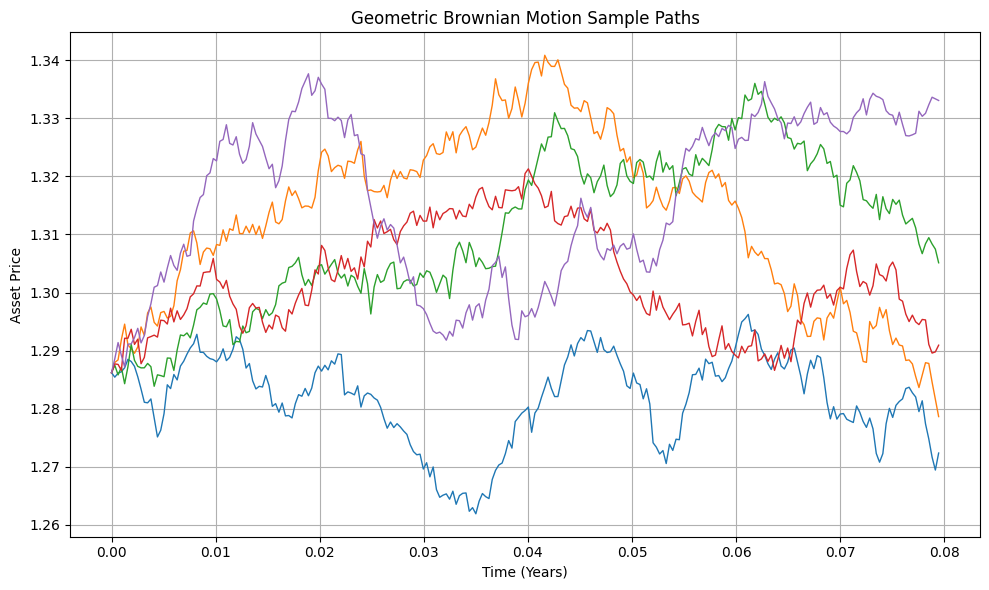

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm_paths(S0, T, r, sigma, steps=252, paths=5):
    dt = T / steps
    time_grid = np.linspace(0, T, steps + 1)
    prices = np.zeros((paths, steps + 1))
    prices[:, 0] = S0

    for i in range(paths):
        for t in range(1, steps + 1):
            z = np.random.normal()
            prices[i, t] = prices[i, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    return time_grid, prices

# Parameters
S0 = S  # Spot price
num_paths = 5
num_steps = 252  # Daily steps
time_grid, gbm_paths = simulate_gbm_paths(S0, T, r, sigma, steps=num_steps, paths=num_paths)

# Plot
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time_grid, gbm_paths[i], lw=1)

plt.title('Geometric Brownian Motion Sample Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
def binomial_option_price(S, K, T, r, sigma, n, option_type="call", american=False):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))  # up factor
    d = 1 / u                        # down factor
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probability

    # Initialize asset prices at maturity
    asset_prices = np.array([S * (u ** j) * (d ** (n - j)) for j in range(n + 1)])

    # Option values at maturity
    if option_type == "call":
        option_values = np.maximum(0, asset_prices - K)
    else:
        option_values = np.maximum(0, K - asset_prices)

    # Backward induction
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            early_exercise = 0
            asset_price = S * (u ** j) * (d ** (i - j))
            if option_type == "call":
                early_exercise = max(0, asset_price - K)
            else:
                early_exercise = max(0, K - asset_price)

            option_values[j] = np.exp(-r * dt) * (p * option_values[j + 1] + (1 - p) * option_values[j])
            if american:
                option_values[j] = max(option_values[j], early_exercise)

    return option_values[0]


In [48]:

# Binomial Model
call_binom = binomial_option_price(S, K, T, r, sigma, n_steps, option_type="call", american=False)
put_binom = binomial_option_price(S, K, T, r, sigma, n_steps, option_type="put", american=False)

# CRR Model (Reusing same from before)
call_crr = crr_option_price(S, K, T, r, sigma, n_steps, option_type="call")
put_crr = crr_option_price(S, K, T, r, sigma, n_steps, option_type="put")

print("Binomial Call Price:", call_binom)
print("Binomial Put Price:", put_binom)
print("CRR Call Price:", call_crr)
print("CRR Put Price:", put_crr)


Binomial Call Price: 0.01445764882713232
Binomial Put Price: 0.011395562626176367
CRR Call Price: 0.01445764882713232
CRR Put Price: 0.011395562626176367


In [49]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from datetime import date

# Parameters
spot_price = 1.10  # ATM, so strike = spot
strike_price = 1.10
valuation_date = date(2025, 5, 2)
maturity_date = date(2025, 5, 31)
T = (maturity_date - valuation_date).days / 365  # ≈ 0.079
r = 0.02  # Annualized risk-free rate

# Define or load your historical volatility here
volatility = historical_volatility  # Replace with your actual calculated volatility

def black_scholes_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call, put

call_bs, put_bs = black_scholes_price(spot_price, strike_price, T, r, volatility)
print("Black-Scholes Call Price:", call_bs)
print("Black-Scholes Put Price:", put_bs)


Black-Scholes Call Price: 0.011933144504276516
Black-Scholes Put Price: 0.01018658734186284


In [50]:
def crr_option_price(S, K, T, r, sigma, n, option_type="call"):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Stock prices at maturity
    ST = np.array([S * (u**j) * (d**(n - j)) for j in range(n + 1)])

    # Option values at maturity
    if option_type == "call":
        option_values = np.maximum(0, ST - K)
    else:
        option_values = np.maximum(0, K - ST)

    # Backward induction
    for i in range(n - 1, -1, -1):
        option_values = np.exp(-r * dt) * (p * option_values[1:] + (1 - p) * option_values[:-1])

    return option_values[0]

steps = 100
call_crr = crr_option_price(spot_price, strike_price, T, r, volatility, steps, option_type="call")
put_crr = crr_option_price(spot_price, strike_price, T, r, volatility, steps, option_type="put")
print("CRR Call Price:", call_crr)
print("CRR Put Price:", put_crr)


CRR Call Price: 0.011905529989514049
CRR Put Price: 0.010158972827109505


In [51]:
def simulate_gbm(S, T, r, sigma, simulations, steps):
    dt = T / steps
    prices = np.zeros((simulations, steps + 1))
    prices[:, 0] = S

    for i in range(simulations):
        for j in range(1, steps + 1):
            z = np.random.standard_normal()
            prices[i, j] = prices[i, j - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    return prices

def monte_carlo_option_price(prices, K, T, r, option_type="call"):
    if option_type == "call":
        payoffs = np.maximum(0, prices[:, -1] - K)
    else:
        payoffs = np.maximum(0, K - prices[:, -1])
    return np.exp(-r * T) * np.mean(payoffs)

simulations = 10000
steps = 252
sim_prices = simulate_gbm(spot_price, T, r, volatility, simulations, steps)

call_sim = monte_carlo_option_price(sim_prices, strike_price, T, r, "call")
put_sim = monte_carlo_option_price(sim_prices, strike_price, T, r, "put")

print("Monte Carlo Call Price:", call_sim)
print("Monte Carlo Put Price:", put_sim)


Monte Carlo Call Price: 0.011842481123189573
Monte Carlo Put Price: 0.010235224744715665


In [52]:
comparison = pd.DataFrame({
    "Method": ["Black-Scholes", "CRR", "Simulation"],
    "Call Price": [call_bs, call_crr, call_sim],
    "Put Price": [put_bs, put_crr, put_sim]
})
print(comparison)


          Method  Call Price  Put Price
0  Black-Scholes    0.011933   0.010187
1            CRR    0.011906   0.010159
2     Simulation    0.011842   0.010235


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3739.06
Distribution:                  Normal   AIC:                           7484.12
Method:            Maximum Likelihood   BIC:                           7503.67
                                        No. Observations:                 4998
Date:                Fri, May 02 2025   Df Residuals:                     4998
Time:                        11:56:47   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.3970e-03  4.421e-04      3.160  1.577e-03 [5.

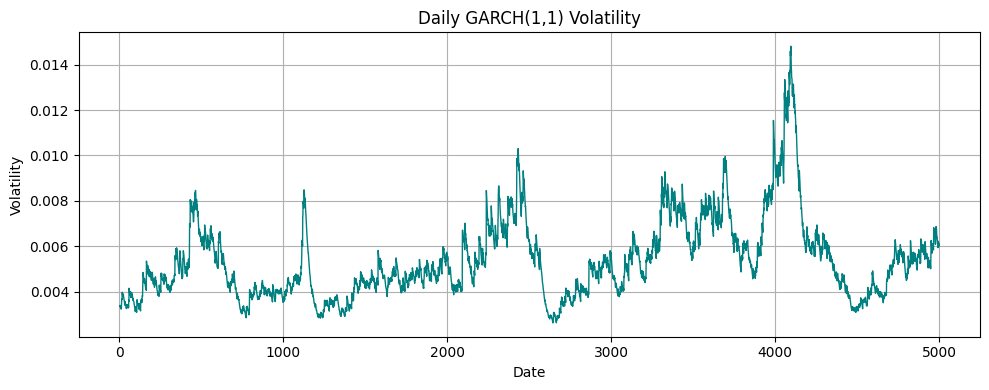

Most recent daily vol:     0.6018%
Annualized GARCH(1,1) vol: 9.5534%


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Assuming df['Price'] contains your price series (e.g., FX rates)
prices = df['Price']
log_ret = np.log(prices / prices.shift(1)).dropna() * 100  # log returns in percent

# GARCH(1,1) model
model = arch_model(log_ret, mean='Zero', vol='GARCH', p=1, q=1)
fitted = model.fit(disp='off')

# Summary of model fit
print(fitted.summary())

# Daily conditional volatility (converted from % to decimal)
daily_vol = fitted.conditional_volatility / 100

# Plot daily volatility
plt.figure(figsize=(10, 4))
plt.plot(daily_vol, color='teal', linewidth=1)
plt.title('Daily GARCH(1,1) Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

# Annualize the most recent volatility estimate
most_recent = daily_vol.iloc[-1]
annual_g_vol = most_recent * np.sqrt(252)
print(f"Most recent daily vol:     {most_recent:.4%}")
print(f"Annualized GARCH(1,1) vol: {annual_g_vol:.4%}")


In [54]:
# Dates
valuation_date = date(2025, 5, 2)
maturity_date = date(2025, 5, 31)
T = (maturity_date - valuation_date).days / 365  # ≈ 0.079 years

# ATM setup
S = df['Price'].iloc[-1]  # Current spot price (ATM)
K = S  # ATM Strike

r = 0.03  # Risk-free rate (annual)


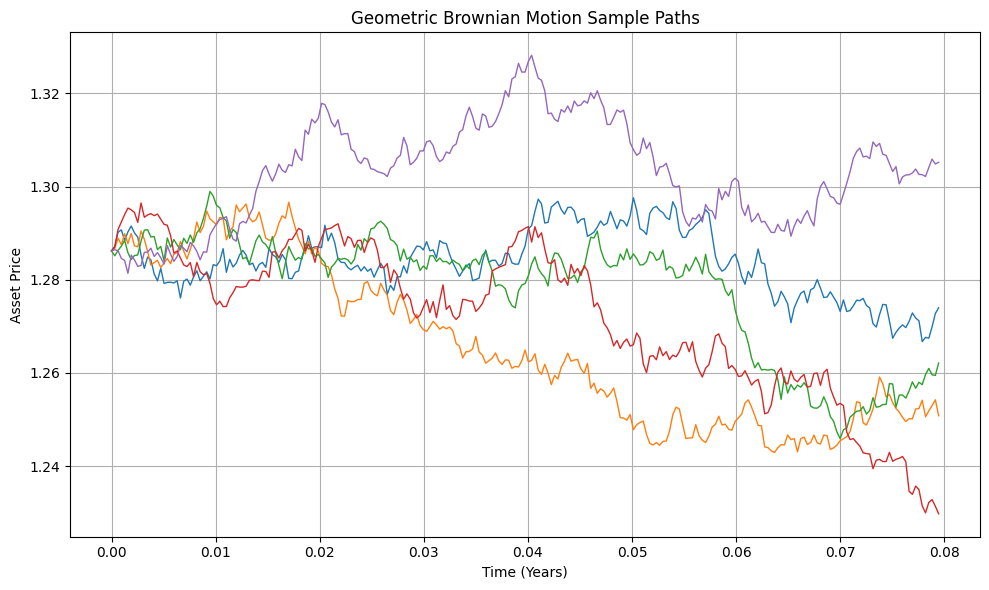

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm_paths(S0, T, r, sigma, steps=252, paths=5):
    dt = T / steps
    time_grid = np.linspace(0, T, steps + 1)
    prices = np.zeros((paths, steps + 1))
    prices[:, 0] = S0

    for i in range(paths):
        for t in range(1, steps + 1):
            z = np.random.normal()
            prices[i, t] = prices[i, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    return time_grid, prices

# Parameters
S0 = S  # Spot price
num_paths = 5
num_steps = 252  # Daily steps
time_grid, gbm_paths = simulate_gbm_paths(S0, T, r, sigma, steps=num_steps, paths=num_paths)

# Plot
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time_grid, gbm_paths[i], lw=1)

plt.title('Geometric Brownian Motion Sample Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call, put

call_bs, put_bs = black_scholes(S, K, T, r, sigma)
print("Black-Scholes Call Price:", call_bs)
print("Black-Scholes Put Price:", put_bs)

Black-Scholes Call Price: 0.014490004338463147
Black-Scholes Put Price: 0.011427918137507098


In [57]:
def crr_binomial(S, K, T, r, sigma, n=100):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Terminal payoff
    prices = np.array([S * u**j * d**(n - j) for j in range(n + 1)])
    call = np.maximum(0, prices - K)
    put = np.maximum(0, K - prices)

    # Backward induction
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            call[j] = np.exp(-r * dt) * (p * call[j + 1] + (1 - p) * call[j])
            put[j] = np.exp(-r * dt) * (p * put[j + 1] + (1 - p) * put[j])

    return call[0], put[0]

call_crr, put_crr = crr_binomial(S, K, T, r, sigma, n=100)
print("CRR Call Price:", call_crr)
print("CRR Put Price:", put_crr)

CRR Call Price: 0.01445764882713232
CRR Put Price: 0.011395562626176367


In [58]:
def simulate_gbm(S, T, r, sigma, simulations=10000, steps=252):
    dt = T / steps
    prices = np.zeros((simulations, steps + 1))
    prices[:, 0] = S
    for i in range(simulations):
        for j in range(1, steps + 1):
            z = np.random.standard_normal()
            prices[i, j] = prices[i, j - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return prices

def monte_carlo_option(prices, K, T, r):
    call_payoffs = np.maximum(prices[:, -1] - K, 0)
    put_payoffs = np.maximum(K - prices[:, -1], 0)
    call = np.exp(-r * T) * np.mean(call_payoffs)
    put = np.exp(-r * T) * np.mean(put_payoffs)
    return call, put

sim_prices = simulate_gbm(S, T, r, sigma)
call_mc, put_mc = monte_carlo_option(sim_prices, K, T, r)
print("Monte Carlo Call Price:", call_mc)
print("Monte Carlo Put Price:", put_mc)

Monte Carlo Call Price: 0.014673166001064783
Monte Carlo Put Price: 0.011335983974096006


           Model  Call Price  Put Price
0  Black-Scholes    0.014490   0.011428
1   CRR Binomial    0.014458   0.011396
2    Monte Carlo    0.014673   0.011336


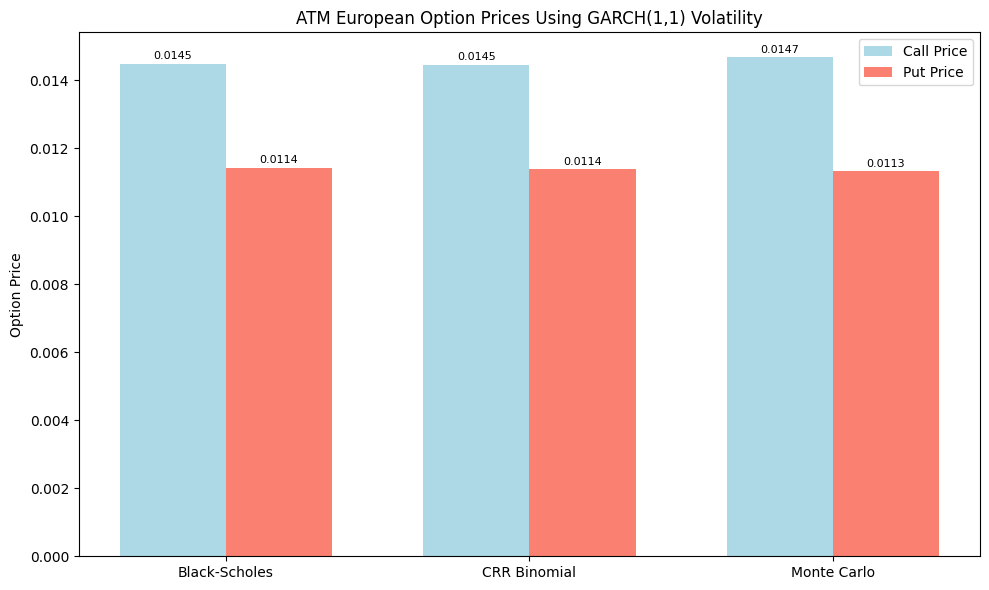

In [59]:
import matplotlib.pyplot as plt

models = ["Black-Scholes", "CRR Binomial", "Monte Carlo"]
call_prices = [call_bs, call_crr, call_mc]
put_prices = [put_bs, put_crr, put_mc]

# Create DataFrame
results = pd.DataFrame({
    'Model': models,
    'Call Price': call_prices,
    'Put Price': put_prices
})
print(results)

# Plot
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, call_prices, width, label='Call Price', color='lightblue')
bar2 = ax.bar(x + width/2, put_prices, width, label='Put Price', color='salmon')

ax.set_ylabel('Option Price')
ax.set_title('ATM European Option Prices Using GARCH(1,1) Volatility')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

plt.tight_layout()
plt.show()
